In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from fbprophet import Prophet
%config Completer.use_jedi = False

In [2]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [3]:
df=pd.read_csv('C:/Users/Joema/Desktop/Python Codes/Docs_Analysis/covid_19_clean_complete.csv')

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [11]:
df.nunique()
df['Date']=pd.to_datetime(df['Date'])
df['Country/Region']=df['Country/Region'].astype('category')
df['Province/State']=df['Province/State'].astype('category')
df['WHO Region']=df['WHO Region'].astype('category')

In [9]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [27]:
cases=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

<ipython-input-27-367a981809f8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cases=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()


In [28]:
cases.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [ ]:
#USING Facebook's Phrophet forecasting model!!!

In [30]:
cases_prophet=cases.rename(columns={'Date':'ds','Confirmed':'y'})

In [31]:
cases_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [36]:
m=Prophet()

In [37]:
model=m.fit(cases_prophet)*

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
"""this part of the Prophet model i need to create the future data for the prediction purposes. This is going to make 
a new df with the added number of period + frequecy to it"""
future_model=model.make_future_dataframe(periods=30,freq='D')

In [41]:
future_model.tail()

,ds
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


In [42]:
prediction=model.predict(future_model)

In [44]:
# the 'yhat' is the actual prediction. The 'yhat_lower' & 'yhat_upper' are extremely relevant as well.
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.063986e+04,-1.300294e+05,8.871630e+04,-1.063986e+04,-1.063986e+04,-10982.447793,-10982.447793,-10982.447793,-10982.447793,-10982.447793,-10982.447793,0.0,0.0,0.0,-2.162230e+04
1,2020-01-23,-7.901275e+03,-1.137831e+05,9.259550e+04,-7.901275e+03,-7.901275e+03,-1076.670504,-1076.670504,-1076.670504,-1076.670504,-1076.670504,-1076.670504,0.0,0.0,0.0,-8.977945e+03
2,2020-01-24,-5.162694e+03,-1.025692e+05,1.121851e+05,-5.162694e+03,-5.162694e+03,10097.471121,10097.471121,10097.471121,10097.471121,10097.471121,10097.471121,0.0,0.0,0.0,4.934777e+03
3,2020-01-25,-2.424113e+03,-9.503317e+04,1.218604e+05,-2.424113e+03,-2.424113e+03,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,0.0,0.0,0.0,1.131731e+04
4,2020-01-26,3.144674e+02,-9.423641e+04,1.096962e+05,3.144674e+02,3.144674e+02,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,0.0,0.0,0.0,7.551169e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144058e+07,2.103880e+07,2.182501e+07,2.104714e+07,2.181139e+07,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,0.0,0.0,0.0,2.145432e+07
214,2020-08-23,2.164466e+07,2.121682e+07,2.207286e+07,2.122732e+07,2.203868e+07,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,0.0,0.0,0.0,2.165190e+07
215,2020-08-24,2.184875e+07,2.138207e+07,2.227756e+07,2.140580e+07,2.227192e+07,-2165.964784,-2165.964784,-2165.964784,-2165.964784,-2165.964784,-2165.964784,0.0,0.0,0.0,2.184658e+07
216,2020-08-25,2.205283e+07,2.154350e+07,2.250526e+07,2.159010e+07,2.250290e+07,-16850.516589,-16850.516589,-16850.516589,-16850.516589,-16850.516589,-16850.516589,0.0,0.0,0.0,2.203598e+07


In [47]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145432e+07,2.103880e+07,2.182501e+07
214,2020-08-23,2.165190e+07,2.121682e+07,2.207286e+07
215,2020-08-24,2.184658e+07,2.138207e+07,2.227756e+07
216,2020-08-25,2.203598e+07,2.154350e+07,2.250526e+07
217,2020-08-26,2.224593e+07,2.172455e+07,2.274083e+07


'The dark blue line, in the middle, represent the predictive values, the black dot points you see are the actual \nconfirmed cases in this example. & the shaded blue is the predictions yhat_lower & yhat_upper. You can confirm from the \ndates on the x axis that its representing future dates '

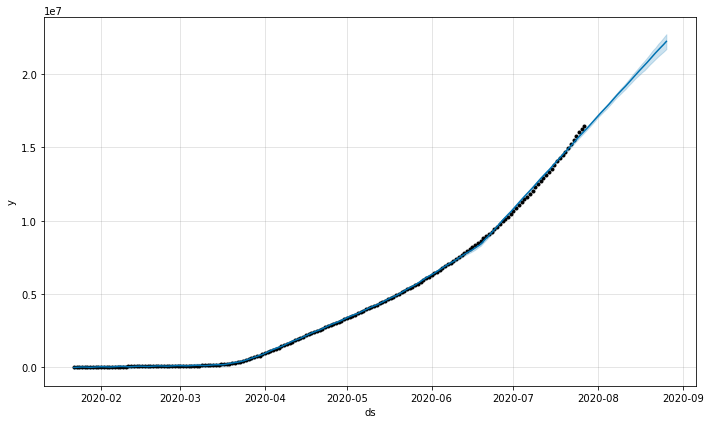

In [55]:
model.plot(prediction)
"""The dark blue line, in the middle, represent the predictive values, the black dot points you see are the actual 
confirmed cases in this example. & the shaded blue is the predictions yhat_lower & yhat_upper. You can confirm from the 
dates on the x axis that its representing future dates """

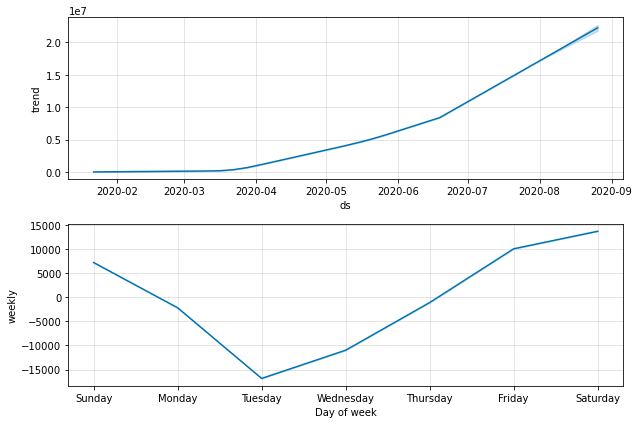

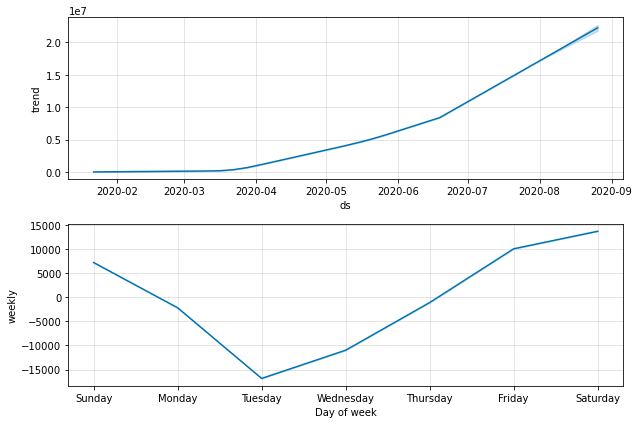

In [56]:
#this shows a plots with each of the components plotted out
model.plot_components(prediction)

In [57]:
from fbprophet.plot import add_changepoints_to_plot
#the add_changepoints_to_plot is a great way to identify exactly where the trend changed at on your plot

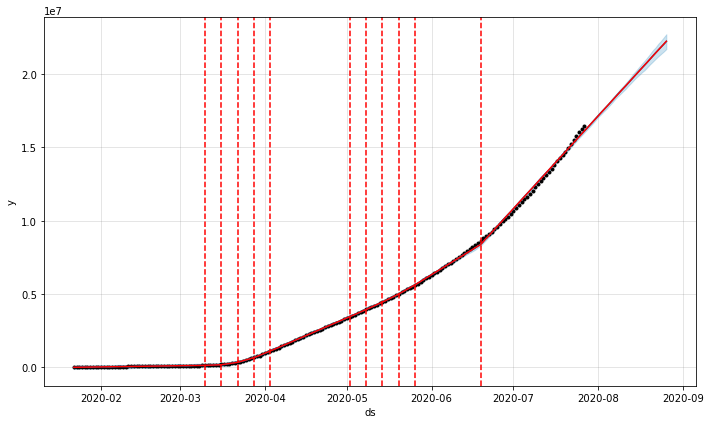

In [58]:
fig=model.plot(prediction)

"""the first parameter, of the below function, ax= is referring to what are your axis. The .gca() method stands for get 
current axis and is useful here. The m= parameter is your base model made from the Prophet() function. Lastly the fcst= 
parameters is your df with the prediction periods"""
fig_trend=add_changepoints_to_plot(fig.gca(),model,prediction)